# Commodity Price Prediction Using ARIMA

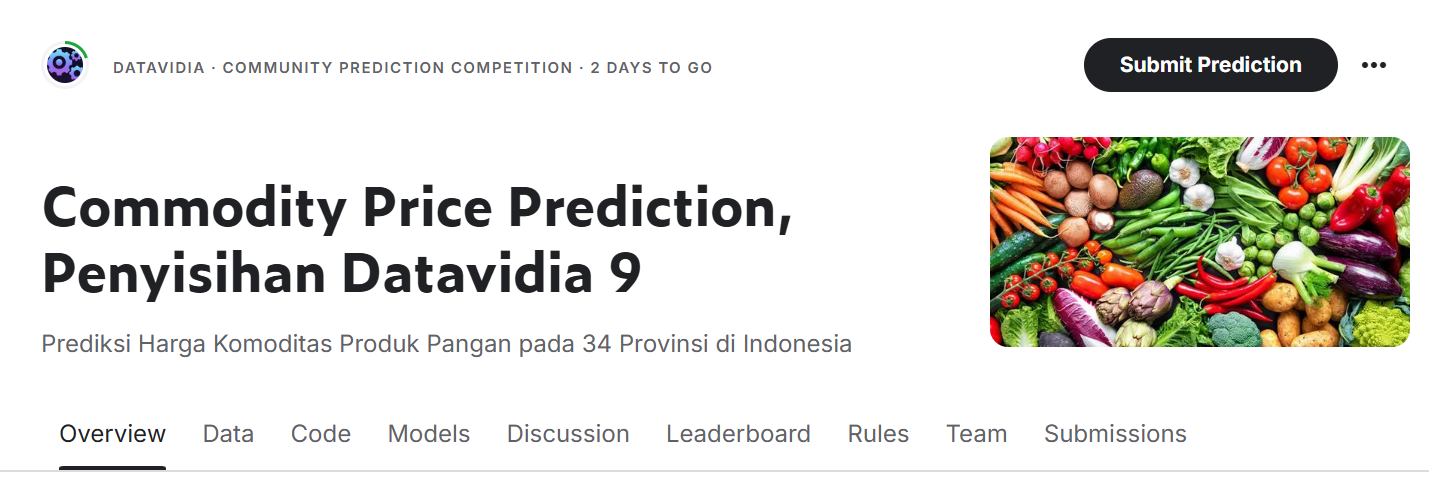

**Overview**

Seiring dengan meningkatnya volatilitas pasar pangan global, memprediksi harga komoditas pangan dengan akurat menjadi tantangan penting bagi pembuat kebijakan, pelaku bisnis, dan peneliti. Kompetisi Prediksi Harga Komoditas Pangan ini memberikan kesempatan bagi peserta untuk menganalisis faktor-faktor yang mempengaruhi fluktuasi harga bahan pangan. Dataset yang digunakan mencakup tren harga historis, kondisi pasar, dan indikator ekonomi yang berperan dalam perubahan harga pangan di berbagai wilayah. Dengan menerapkan teknik data science, peserta dapat menggali wawasan mendalam tentang dinamika pasar yang mendasari pergerakan harga.

**Permasalahan**

Fluktuasi harga komoditas pangan memiliki dampak ekonomi dan sosial yang signifikan, mulai dari anggaran rumah tangga hingga kebijakan perdagangan global. Dalam kompetisi ini, peserta ditantang untuk mengembangkan model prediktif yang dapat memperkirakan harga komoditas pangan berdasarkan data historis. Dataset yang diberikan mencakup berbagai fitur seperti harga sebelumnya, nilai tukar mata uang, tren pasokan global, serta indikator makroekonomi. Dengan menggunakan data tersebut, peserta diharapkan dapat membangun model yang mampu memprediksi harga setiap komoditas tiap tanggal pada rentang waktu tertentu dengan tingkat akurasi yang tinggi.

**Tujuan**

Tujuan dari kompetisi ini adalah mendorong para data scientist untuk mengasah keterampilan mereka dalam membangun model prediksi yang akurat. Dengan berpartisipasi, peserta turut berkontribusi dalam pemahaman yang lebih mendalam mengenai pergerakan harga pangan dan dampaknya terhadap ketahanan pangan serta stabilitas ekonomi. Selain meningkatkan kemampuan teknis, kompetisi ini juga berfokus pada pentingnya pengambilan keputusan berbasis data dalam mengelola rantai pasokan pangan dan mengurangi risiko volatilitas harga.

---

## Import Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

## Mengumpulkan CSV File

In [2]:
csv_files = [
    'Bawang Merah.csv', 'Bawang Putih Bonggol.csv', 'Beras Medium.csv', 'Beras Premium.csv',
    'Cabai Merah Keriting.csv', 'Cabai Rawit Merah.csv', 'Daging Ayam Ras.csv', 'Daging Sapi Murni.csv',
    'Gula Konsumsi.csv', 'Minyak Goreng Curah.csv', 'Minyak Goreng Kemasan Sederhana.csv',
    'Telur Ayam Ras.csv', 'Tepung Terigu (Curah).csv'
]

## Mendapatkan List Provinsi (34)

In [3]:
provinces = [
    'Aceh', 'Bali', 'Banten', 'Bengkulu', 'DI Yogyakarta', 'DKI Jakarta', 'Gorontalo', 'Jambi',
    'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan',
    'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Bangka Belitung',
    'Kepulauan Riau', 'Lampung', 'Maluku Utara', 'Maluku', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
    'Papua Barat', 'Papua', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
    'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara'
]

## Proses Data (gabung dan setting)

In [4]:
all_data = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.interpolate(method='time')
    df['Commodity'] = csv_file.replace('.csv', '')
    all_data.append(df)

all_data = pd.concat(all_data, axis=0).reset_index()

## Time Period

In [5]:
train_end_date = '2024-09-30'
test_start_date = '2024-10-01'
test_end_date = '2024-12-31'
test_dates = pd.date_range(start=test_start_date, end=test_end_date)

## Training ARIMA

In [6]:
predictions = []
visualization_data = {}
for commodity in all_data['Commodity'].unique():
    for province in provinces:
        data = all_data[all_data['Commodity'] == commodity][['Date', province]].dropna()
        if data.empty or len(data) < 10:
            continue

        data.set_index('Date', inplace=True)
        data = data.rename(columns={province: 'Price'})
        train_data = data.loc[:train_end_date, 'Price']

        if len(train_data) < 10:
            continue

        order = (1, 1, 1)
        try:
            model = ARIMA(train_data, order=order)
            results = model.fit()
            forecast = results.forecast(steps=len(test_dates))

            for date, price in zip(test_dates, forecast):
                id_str = f"{commodity}/{province}/{date.strftime('%Y-%m-%d')}"
                predictions.append({'id': id_str, 'price': price})

            visualization_data[(commodity, province)] = (train_data, test_dates, forecast)
        except Exception as e:
            print(f"Error pada {commodity}/{province}: {e}")
            continue

## Result

In [7]:
submission_df = pd.DataFrame(predictions)
submission_df = submission_df[['id', 'price']]
submission_df.to_csv('submission.csv', index=False)
print("Prediksi telah disimpan ke 'submission.csv'")

Prediksi telah disimpan ke 'submission.csv'


## A visualisation

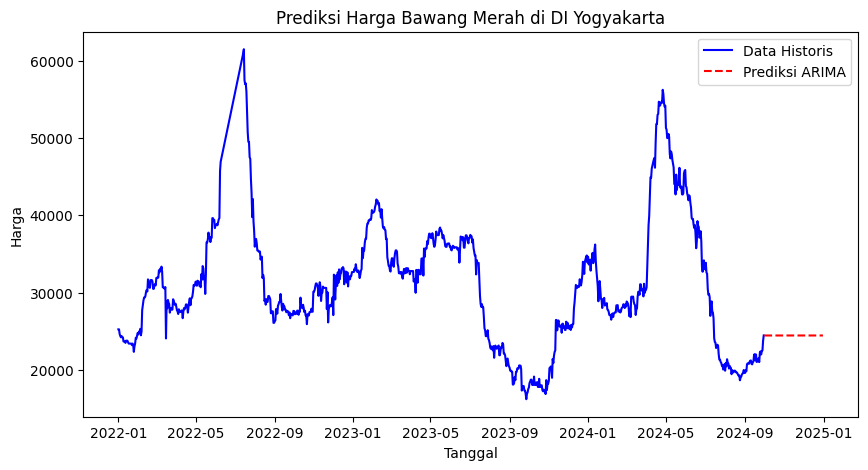

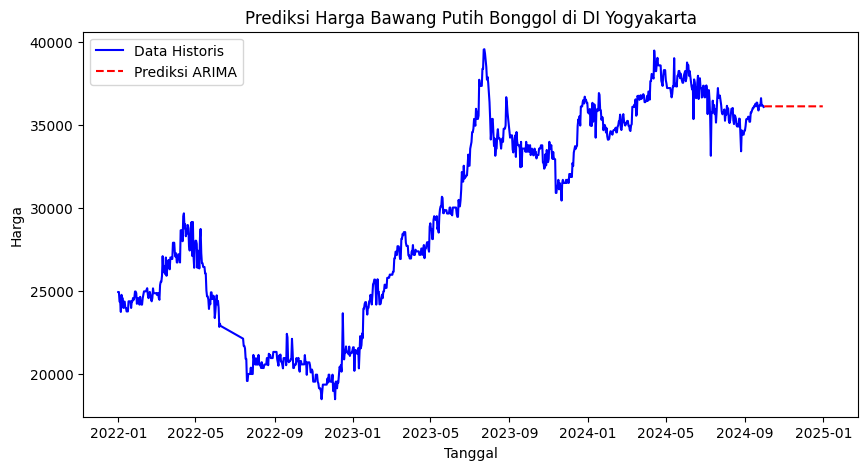

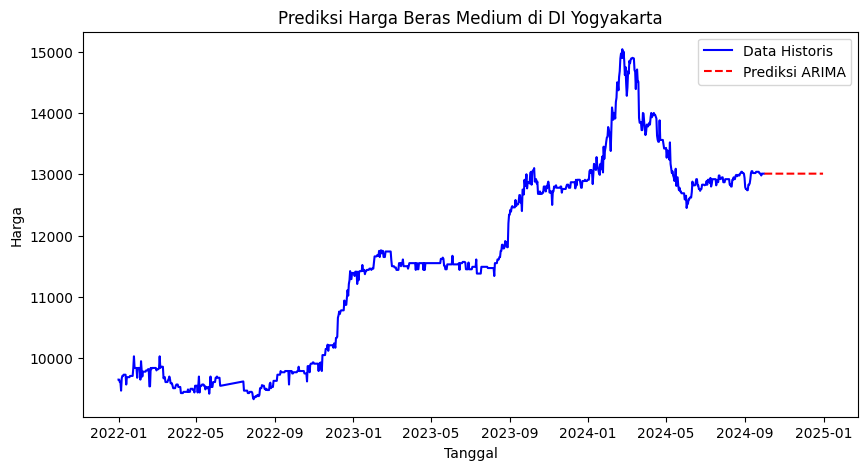

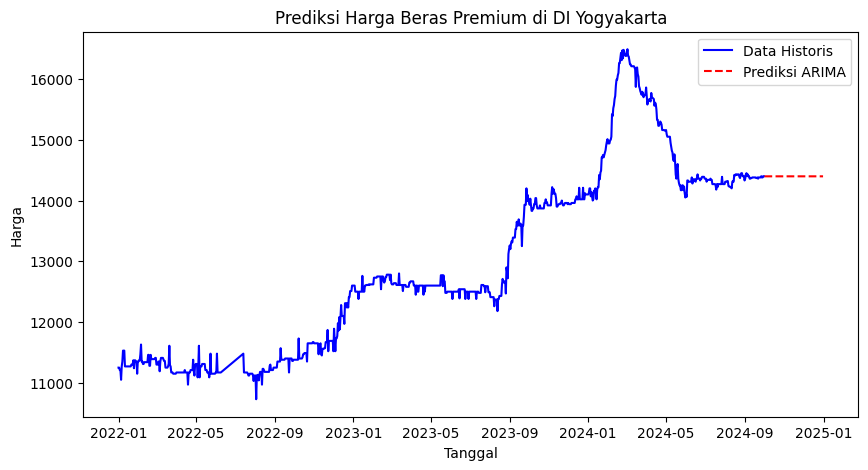

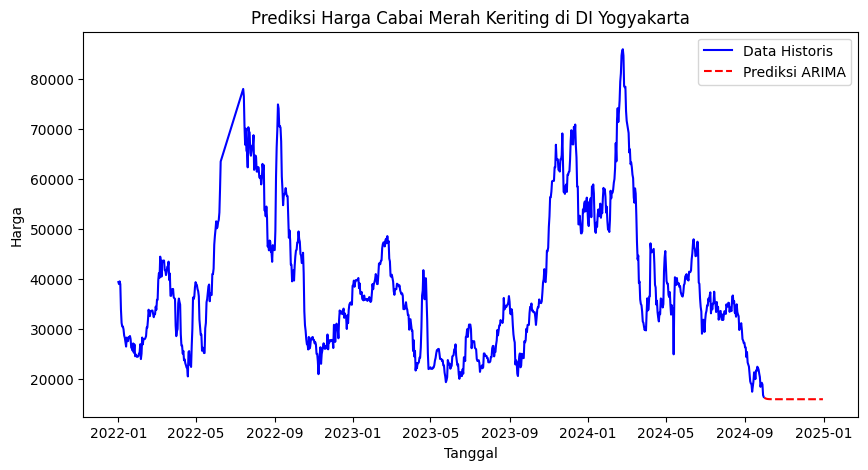

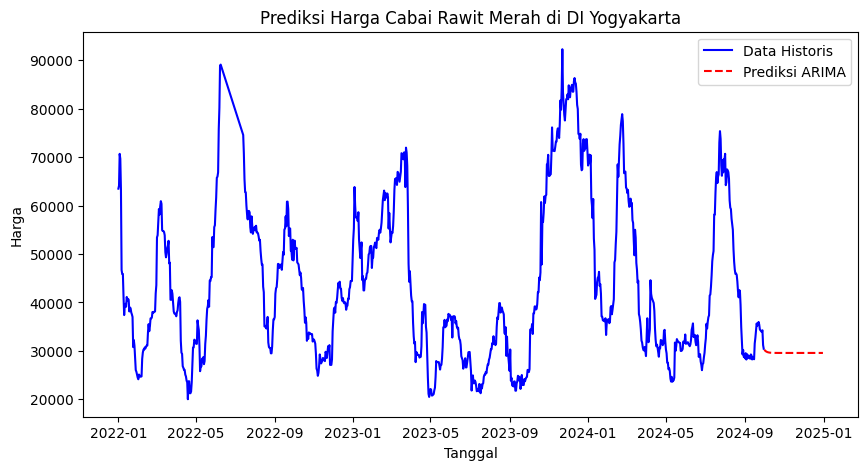

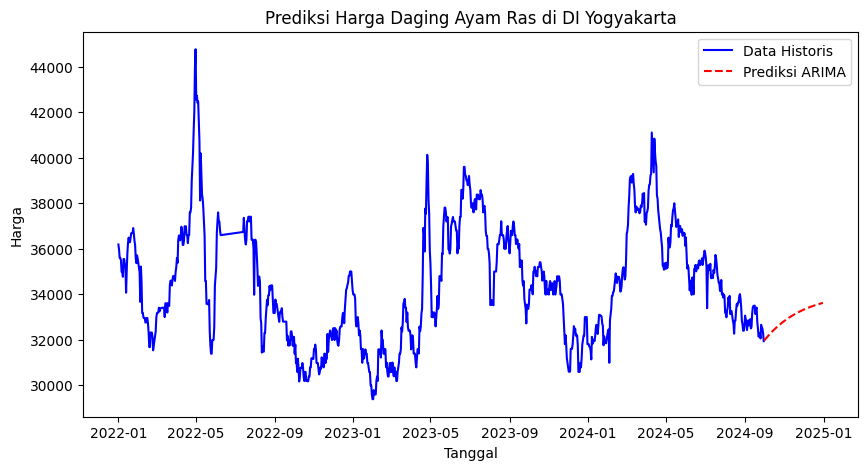

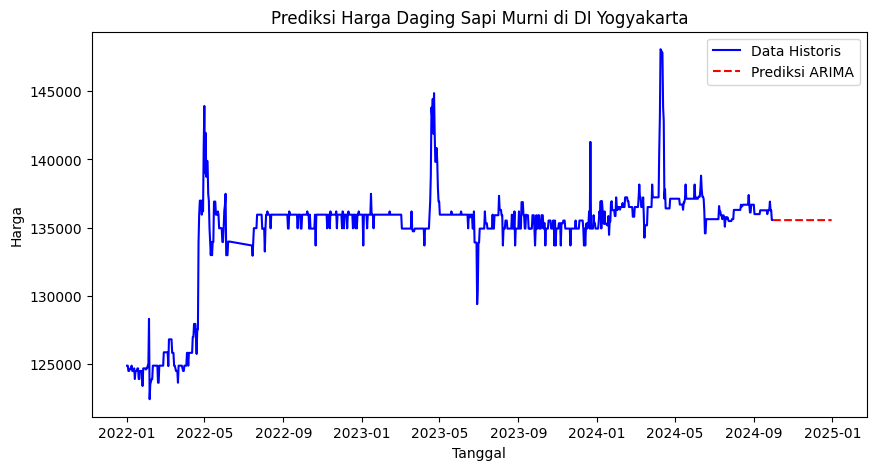

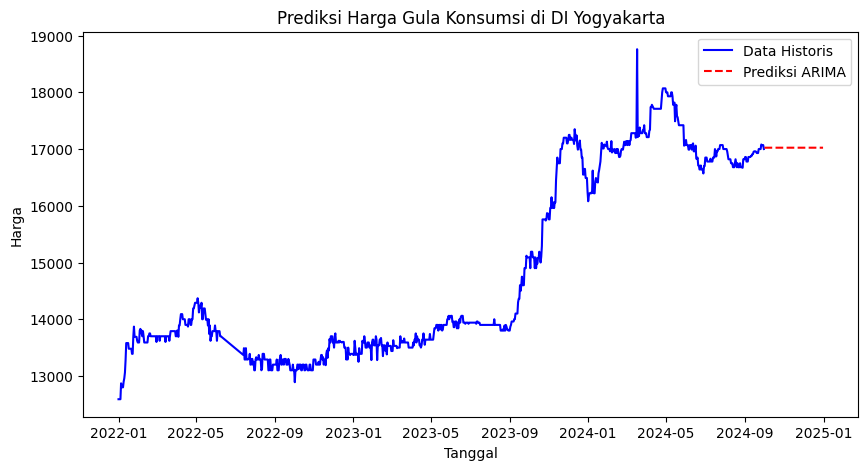

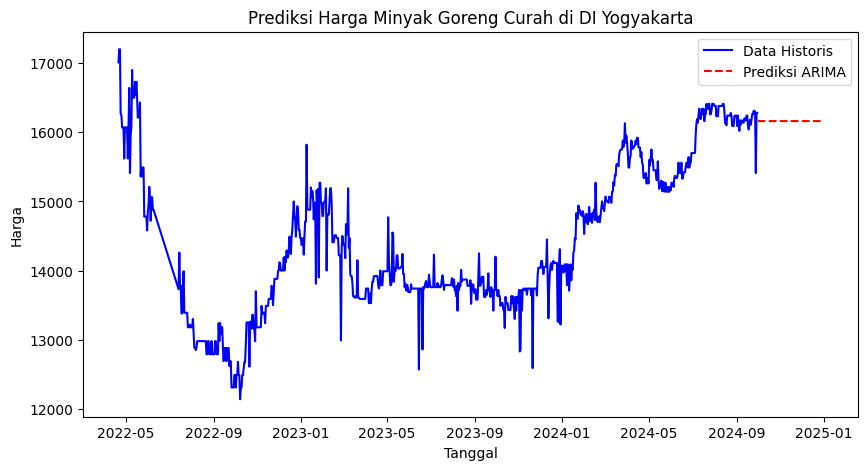

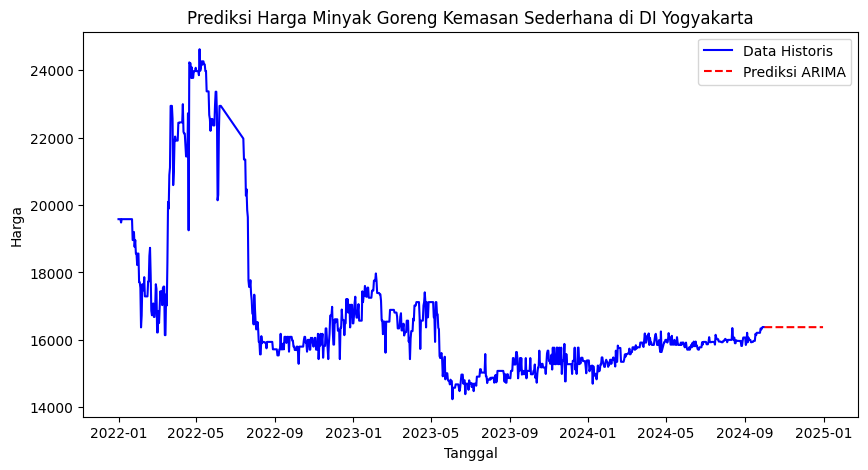

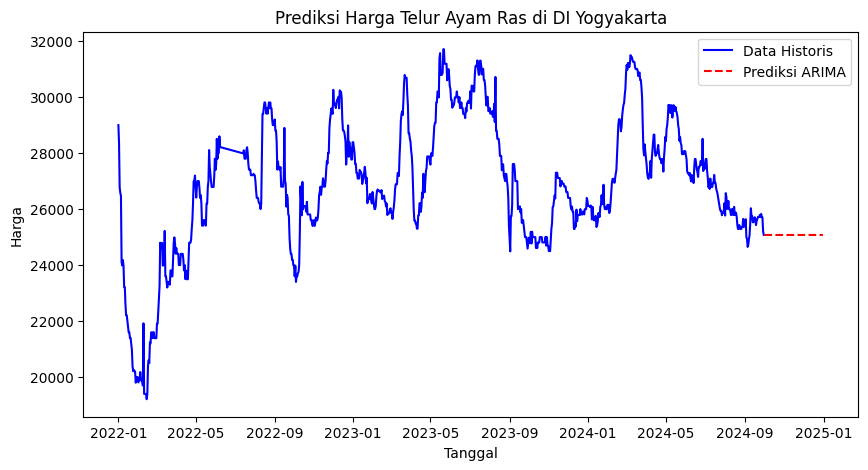

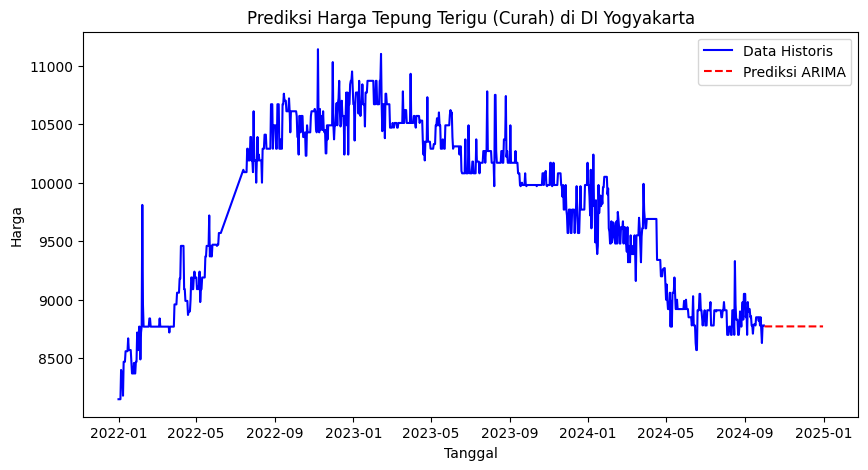

In [11]:
for (commodity, province), (train_data, test_dates, forecast) in visualization_data.items():
    if province == "DI Yogyakarta":  # Filter hanya untuk DI Yogyakarta
        plt.figure(figsize=(10, 5))
        plt.plot(train_data.index, train_data, label='Data Historis', color='blue')
        plt.plot(test_dates, forecast, label='Prediksi ARIMA', color='red', linestyle='dashed')
        plt.xlabel('Tanggal')
        plt.ylabel('Harga')
        plt.title(f'Prediksi Harga {commodity} di {province}')
        plt.legend()
        plt.show()